<a href="https://colab.research.google.com/github/vijay-93/IMDB-dataset-NLTK-model-/blob/main/IMDB_Movie_review_(NLTK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis of IMDB reviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('IMDB Dataset.csv')
df.head()
df.shape


(50000, 2)

In [ ]:
# Review Frquency Count
vc_df = pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'positive', 0: 'negative'}) 
vc_df 

,Sentiment,Count
0,NaN,25000
1,NaN,25000


# Pre-processing the data


1)Remove Punctuation
2)Replace short words
3)Making text lower case
4)Remove stopwords
5)Lemmatization

In [ ]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
#removing the punctuatio
df['review_processed']=df['review'].str.replace("[^a-zA-Z0-9]", " ") # when the word is not a-z,A-Z,0-9 replace with Space mark 
df = df[['review','review_processed','sentiment']] #Re ordering columns


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df['review_processed'] # removed all puctuations 

0        One of the other reviewers has mentioned that ...
1        A wonderful little production   br    br   The...
2        I thought this was a wonderful way to spend ti...
3        Basically there s a family where a little boy ...
4        Petter Mattei s  Love in the Time of Money  is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot  bad dialogue  bad acting  idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I m going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review_processed, Length: 50000, dtype: object

In [ ]:
# replacing the Short words
' '.join(["this", "batch" , "is", "awesome"])

'this batch is awesome'

In [ ]:
# join the word 

df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))

In [ ]:
df['review_processed'] # removed short word and HTML tag 

0        One the other reviewers has mentioned that aft...
1        wonderful little production The filming techni...
2        thought this was wonderful way spend time too ...
3        Basically there family where little boy Jake t...
4        Petter Mattei Love the Time Money visually stu...
                               ...                        
49995    thought this movie did down right good job was...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary schools n...
49998    going have disagree with the previous comment ...
49999    one expects the Star Trek movies high art but ...
Name: review_processed, Length: 50000, dtype: object

In [ ]:
# reduce into Lower case (Checking )
"vijay"=="Vijay"

word="Vijay"
word.lower()

'vijay'

In [ ]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

In [ ]:
df['review_processed']# all chnages to lower case 

0        one the other reviewers has mentioned that aft...
1        wonderful little production the filming techni...
2        thought this was wonderful way spend time too ...
3        basically there family where little boy jake t...
4        petter mattei love the time money visually stu...
                               ...                        
49995    thought this movie did down right good job was...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going have disagree with the previous comment ...
49999    one expects the star trek movies high art but ...
Name: review_processed, Length: 50000, dtype: object

In [ ]:
# REMOVING STOP WORD 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even','like','see']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([word for word in review_tokenized  if word not in stop_words])
    return rev_new
  
# removed stop word
df['review_processed']= [remove_stopwords(r) for r in df['review_processed']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['review_processed']

0        reviewers mentioned watching episode hooked ri...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought right good job creative original first...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin se...
49999    expects star trek movies high art fans expect ...
Name: review_processed, Length: 50000, dtype: object

#Lemmatization

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df['review_processed']

0        reviewer mention watch episode hook right exac...
1        wonderful little production film technique una...
2        think wonderful way spend time hot summer week...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought right good job creative original first...
49996    bad plot bad dialogue bad act idiotic direct a...
49997    catholic teach parochial elementary school nun...
49998    go disagree previous comment side maltin secon...
49999    expect star trek movie high art fan expect goo...
Name: review_processed, Length: 50000, dtype: object

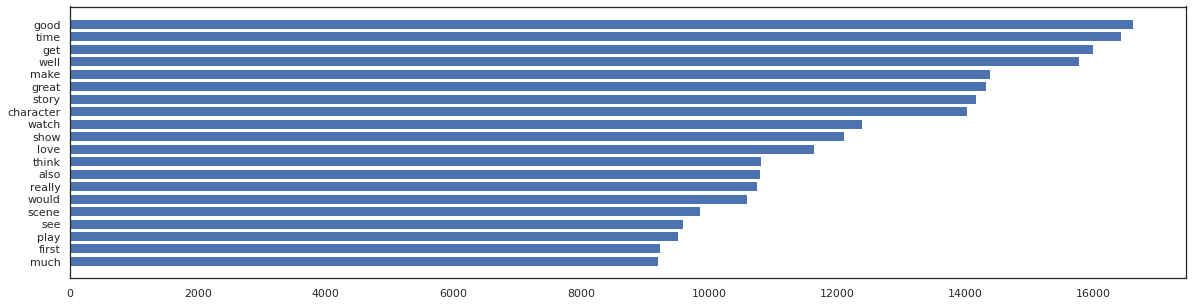

In [ ]:
## Plotting most frequent words from positive reviews using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

 #Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

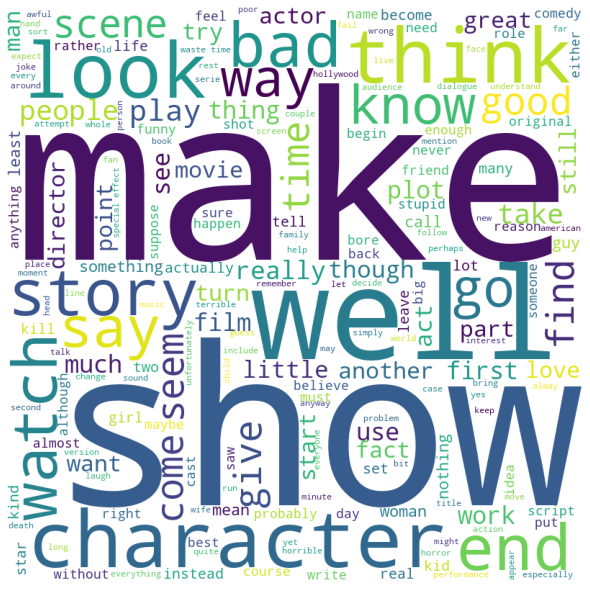

In [ ]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

#Bag of Words Model

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating sparse matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names()


#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
